In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import scipy.misc as smp
import matplotlib.pyplot as plt
from pylab import *
import numpy, imageio, glob, sys, os, random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer

In [3]:
def get_labels_and_files(folder):
    filelists = []
    for label in range(0,10):
        filelist = []
        filelists.append(filelist);
        dirname = os.path.join(folder, chr(ord('A') + label))
        for file in os.listdir(dirname):
            if (file.endswith('.png')):
                fullname = os.path.join(dirname, file)
            if (os.path.getsize(fullname) > 0):
                filelist.append(fullname)
            else:
                print('file ' + fullname + ' is empty')
        filelist.sort()

    labelsAndFiles = []
    for label in range(0,10):
        filelist = filelists[label]
        for filename in filelist:
            labelsAndFiles.append((label, filename))

    return labelsAndFiles

def make_arrays(labelsAndFiles):
    images = []
    labels = []
    for i in range(0, len(labelsAndFiles)):
        if (i % 100 == 0):
            sys.stdout.write("\r%d%% complete" % ((i * 100)/len(labelsAndFiles)))
            sys.stdout.flush()

        filename = labelsAndFiles[i][1]
        try:
            image = imageio.imread(filename)
            images.append(image)
            labels.append(labelsAndFiles[i][0])
        except:
            # If this happens we won't have the requested number
            print("\nCan't read image file " + filename)

    count = len(images)
    imagedata = numpy.zeros((count,28,28), dtype=numpy.uint8)
    labeldata = numpy.zeros(count, dtype=numpy.uint8)
    for i in range(0, count):
        imagedata[i] = images[i]
        labeldata[i] = labels[i]
    print("\n")
    return imagedata, labeldata

def write_labeldata(labeldata, outputfile):
    header = numpy.array([0x0801, len(labeldata)], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(labeldata.tobytes())

def write_imagedata(imagedata, outputfile):
    header = numpy.array([0x0803, len(imagedata), 28, 28], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(imagedata.tobytes())

def load_data(dirname):
    labelsAndFiles = get_labels_and_files(dirname)
    random.shuffle(labelsAndFiles)
    imagedata, labeldata = make_arrays(labelsAndFiles)
    return (imagedata, labeldata)

In [4]:
X, Y = load_data('/Users/asaskevich/Downloads/notMNIST_large/')

file /Users/asaskevich/Downloads/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png is empty
file /Users/asaskevich/Downloads/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png is empty
file /Users/asaskevich/Downloads/notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png is empty
file /Users/asaskevich/Downloads/notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png is empty
79% complete
Can't read image file /Users/asaskevich/Downloads/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png
99% complete



In [5]:
Y[0]

3

In [6]:
X[0]

array([[  2,   0,   0,   0,  10,  33,  71, 112, 144, 169, 198, 228, 242,
        254, 255, 246, 227, 215, 191, 151,  86,  16,   0,   0,   2,   0,
          0,   0],
       [  0,  29, 134, 186, 232, 249, 255, 255, 255, 255, 255, 229, 222,
        221, 226, 245, 255, 255, 255, 255, 255, 221, 121,   8,   0,   3,
          0,   0],
       [ 72, 208, 221, 189, 173, 249, 255, 253, 248, 252, 121,   5,   0,
          0,  10,  37,  82, 167, 248, 255, 251, 255, 255, 206,  42,   0,
          2,   0],
       [ 44,  32,   0,   0,   0, 167, 255, 252, 251, 255,  80,   0,   4,
          0,   0,   0,   0,   0,  55, 199, 255, 251, 251, 255, 229,  41,
          0,   2],
       [  0,   0,   1,   6,   3, 121, 255, 251, 251, 255,  87,   1,   4,
          0,   1,   2,   3,   4,   0,   9, 179, 255, 253, 251, 255, 211,
         10,   2],
       [  2,   2,   0,   4,   0,  93, 255, 251, 251, 255,  86,   0,   4,
          0,   0,   0,   0,   0,   3,   0,  12, 209, 255, 252, 251, 255,
        119,   0],
       [  

In [7]:
X.shape

(529114, 28, 28)

In [8]:
image_size = 28
pixel_depth = 255

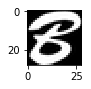

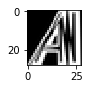

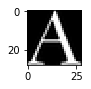

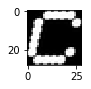

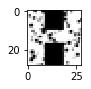

In [9]:
for i in range(5):
    img_mat = (X[np.random.choice(range(len(X)-1))]).reshape(image_size, image_size)
    plt.figure(figsize=(1,1))
    plt.imshow(img_mat, cmap='gray')
    plt.show()

(array([52909., 52911., 52912., 52911., 52912., 52912., 52912., 52912.,
        52912., 52911.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

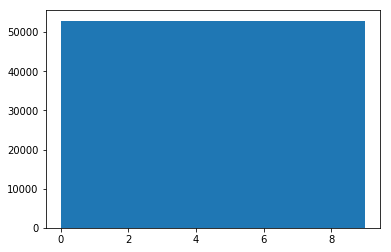

In [10]:
plt.hist(Y)

In [11]:
class Comparator:
    def __init__(self):
        self.architectures = []
        self.results = []
        
    def add_row(self, architecture, accuracy):
        self.architectures.append(architecture)
        self.results.append(accuracy)
        
    def debug(self):
        print('----------------------------------------------------')
        print('Best test accuracy found: %.3f' % max(self.results))
        
        df = pd.DataFrame(zip(self.architectures, self.results), columns=['architecture', 'accuracy'])
        
        return df

In [12]:
comparator = Comparator()

In [13]:
class NetworkTester:
    def __init__(
            self,
            x=[],
            y=[],
            test_percentage=0.2,
            random_state=42,
            use_dropout=False,
            use_regularization=False,
            dropout_prob=0.3,
            epochs=30,
            dataset_size=10e10,
            l1=0,
            l2=0,
            image_size=28,
            hidden_layers_sizes=[],
            hidden_layers_activations=[],
            optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
    ):
        self.epochs = epochs
        self.X = x[:dataset_size, :] / 255.0
        self.Y = y[:dataset_size]
        self.random_state = random_state
        self.test_percentage = test_percentage
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.Y,
                                                                                test_size=self.test_percentage,
                                                                                random_state=self.random_state)
        self.use_dropout = use_dropout
        self.use_regularization = use_regularization
        self.dropout_prob = dropout_prob
        self.l1 = l1
        self.l2 = l2
        self.image_size = image_size
        self.hidden_layers_sizes = hidden_layers_sizes
        self.hidden_layers_activations = hidden_layers_activations
        self.optimizer = optimizer

        if len(self.hidden_layers_sizes) != len(self.hidden_layers_activations):
            raise Exception('Layer sizes must be equal!')

        start = timer()
        self.debug()
        self.build()
        
        self.model.summary()
        
        self.fit(self.X_train, self.y_train)
        self.score(self.X_test, self.y_test)

        end = timer()
        print('----------------------------------------------------------------------------------------')
        print('Execution time: %ds' % (end - start))
        print('----------------------------------------------------------------------------------------')
        print('Accuracy: %.3f' % self.accuracy)
        
        comparator.add_row(self.network_architecture, self.accuracy)

    def debug(self):
        self.network_architecture = (' [%d x %d] -> ' % (self.image_size, self.image_size)) + ' -> '.join(
            map(lambda x: '[%d] -> %s' % (x[0], x[1].func_name),
                zip(self.hidden_layers_sizes, self.hidden_layers_activations))) + ' -> [10] -> softmax'
        
        print('----------------------------------------------------------------------------------------')
        print(self.network_architecture)
        print('----------------------------------------------------------------------------------------')
        print('Initial arguments:')
        print('----------------------------------------------------------------------------------------')
        print('X_train shape =', self.X_train.shape)
        print('X_test shape =', self.X_test.shape)
        print('y_train shape =', self.y_train.shape)
        print('y_test shape =', self.y_test.shape)
        print('Hidden layers = %d layers' % len(self.hidden_layers_sizes))
        print('Epochs to train = %d' % self.epochs)
        print('Beta for regularization: l1 = %.3f, l2 = %.3f' % (self.l1, self.l2))
        print('Dropout prob = %.3f' % self.dropout_prob)
        print('----------------------------------------------------------------------------------------')
        print('Initial flags:')
        print('----------------------------------------------------------------------------------------')
        print('use_dropout=%s, use_regularization=%s' % (self.use_dropout, self.use_regularization))
        print('----------------------------------------------------------------------------------------')

        plt.title('Train and Test distribution')
        plt.subplot(2, 1, 1)
        plt.xlabel('Output')
        plt.ylabel('N')
        plt.hist(self.y_train, label='Train')
        plt.legend()
        plt.subplot(2, 1, 2)
        plt.xlabel('Output')
        plt.ylabel('N')
        plt.hist(self.y_test, label='Test')
        plt.legend()
        plt.show()
        print('----------------------------------------------------------------------------------------')

    def build(self):
        model = keras.Sequential()
        model.add(keras.layers.Flatten(input_shape=(self.image_size, self.image_size)))

        for i in range(len(self.hidden_layers_sizes)):
            if self.use_regularization:
                model.add(keras.layers.Dense(self.hidden_layers_sizes[i], activation=self.hidden_layers_activations[i],
                                             kernel_regularizer=keras.regularizers.l1_l2(l1=self.l1, l2=self.l2),
                                             bias_regularizer=keras.regularizers.l1_l2(l1=self.l1, l2=self.l2)))
            else:
                model.add(keras.layers.Dense(self.hidden_layers_sizes[i], activation=self.hidden_layers_activations[i]))

            if self.use_dropout:
                model.add(keras.layers.Dropout(rate=self.dropout_prob))

        model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=self.optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        self.model = model

    def fit(self, x, y):
        history = self.model.fit(x, y, epochs=self.epochs)
        print('----------------------------------------------------------------------------------------')
        accs = list(history.history.get('acc'))
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(accs)
        plt.show()

    def score(self, x, y):
        test_loss, test_acc = self.model.evaluate(x, y)
        self.accuracy = test_acc


----------------------------------------------------------------------------------------
 [28 x 28] -> [64] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 1 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


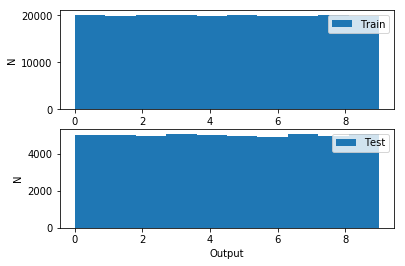

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 10s 50us/step - loss: 0.5510 - acc: 0.8413
Epoch 2/30
200000/200000 [==============================] - 9s 43us/step - loss: 0.4495 - acc: 0.8683: 0s - loss: 0.4488 - acc: 0 - ETA: 0s - loss: 0.4491 - acc: 0
Epoch 3/30
200000/200000 [====================

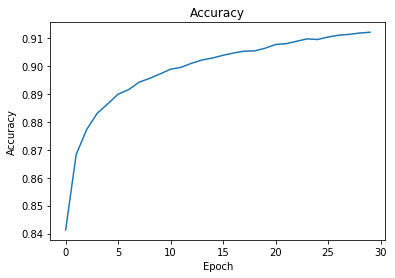

50000/50000 [==============================] - 2s 34us/step
----------------------------------------------------------------------------------------
Execution time: 289s
----------------------------------------------------------------------------------------
Accuracy: 0.885


<__main__.NetworkTester instance at 0x128515a28>

In [13]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[64],
              hidden_layers_activations=[tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05))

----------------------------------------------------------------------------------------
 [28 x 28] -> [128] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 1 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


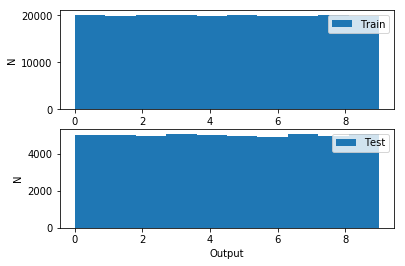

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 16s 80us/step - loss: 0.5346 - acc: 0.8451
Epoch 2/30
200000/200000 [==============================] - 10s 52us/step - loss: 0.4249 - acc: 0.8756
Epoch 3/30
200000/200000 [==============================] - 11s 53us/step - loss: 0.3874 - acc: 0.8865
Ep

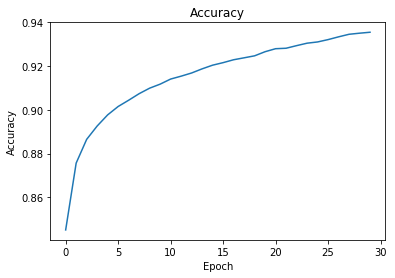

50000/50000 [==============================] - 2s 42us/step
----------------------------------------------------------------------------------------
Execution time: 358s
----------------------------------------------------------------------------------------
Accuracy: 0.893


<__main__.NetworkTester instance at 0x128ffd5a8>

In [14]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[128],
              hidden_layers_activations=[tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05))

----------------------------------------------------------------------------------------
 [28 x 28] -> [256] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 1 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


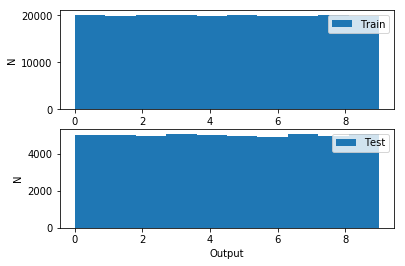

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 14s 69us/step - loss: 0.5203 - acc: 0.8497
Epoch 2/30
200000/200000 [==============================] - 14s 70us/step - loss: 0.4078 - acc: 0.8809
Epoch 3/30
200000/200000 [==============================] - 14s 68us/step - loss: 0.3683 - acc: 0.8915
Ep

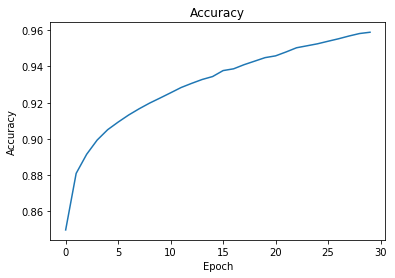

50000/50000 [==============================] - 3s 56us/step
----------------------------------------------------------------------------------------
Execution time: 433s
----------------------------------------------------------------------------------------
Accuracy: 0.898


<__main__.NetworkTester instance at 0x128ffdd40>

In [15]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[256],
              hidden_layers_activations=[tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05))

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 1 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


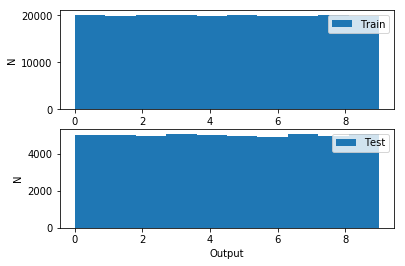

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 30s 150us/step - loss: 0.5088 - acc: 0.8531
Epoch 2/30
200000/200000 [==============================] - 31s 155us/step - loss: 0.3916 - acc: 0.8853
Epoch 3/30
200000/200000 [==============================] - 28s 138us/step - loss: 0.3477 - acc: 0.8983

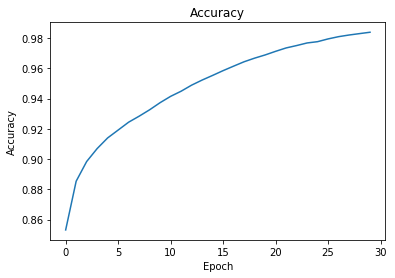

50000/50000 [==============================] - ETA:  - 4s 84us/step
----------------------------------------------------------------------------------------
Execution time: 862s
----------------------------------------------------------------------------------------
Accuracy: 0.908


<__main__.NetworkTester instance at 0x12866da70>

In [16]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size],
              hidden_layers_activations=[tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05))

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> tanh -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 1 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


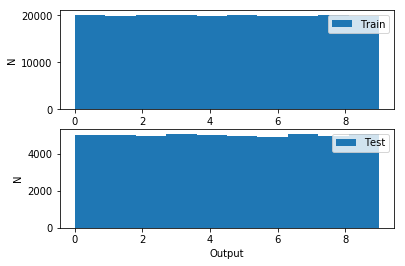

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 28s 141us/step - loss: 0.5880 - acc: 0.8354
Epoch 2/30
200000/200000 [==============================] - 10820s 54ms/step - loss: 0.4653 - acc: 0.8645
Epoch 3/30
200000/200000 [==============================] - 1817s 9ms/step - loss: 0.4112 - acc: 0.87

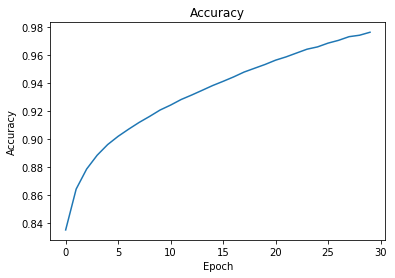

50000/50000 [==============================] - 4s 89us/step
----------------------------------------------------------------------------------------
Execution time: 13489s
----------------------------------------------------------------------------------------
Accuracy: 0.904


<__main__.NetworkTester instance at 0x1294e9098>

In [17]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size],
              hidden_layers_activations=[tf.nn.tanh],
              dataset_size=250000,
              optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05))

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [784] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


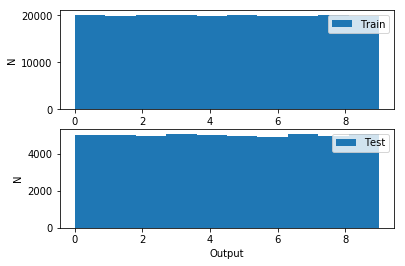

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 93s 467us/step - loss: 0.5930 - acc: 0.8345
Epoch 2/30
200000/200000 [==============================] - 85s 424us/s

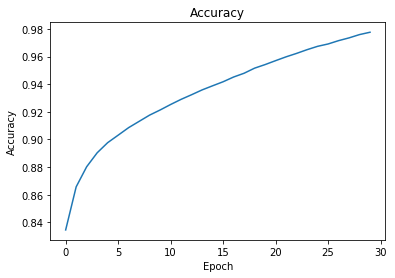

50000/50000 [==============================] - 6s 113us/step
----------------------------------------------------------------------------------------
Execution time: 2151s
----------------------------------------------------------------------------------------
Accuracy: 0.907


<__main__.NetworkTester instance at 0x129b9bd40>

In [18]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.keras.optimizers.SGD(lr=0.01))

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [784] -> relu -> [784] -> relu -> [784] -> relu -> [784] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 5 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


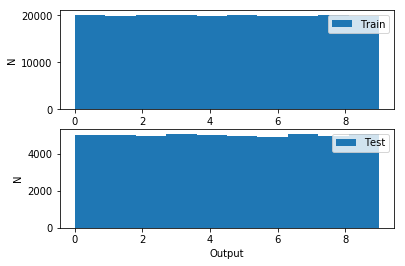

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_14 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_15 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_16 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_17 (Dense)             (None, 784)               615440    
_____________________________________________________

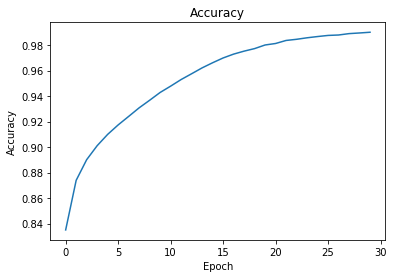

50000/50000 [==============================] - 10s 197us/step
----------------------------------------------------------------------------------------
Execution time: 5931s
----------------------------------------------------------------------------------------
Accuracy: 0.912


<__main__.NetworkTester instance at 0x129267c20>

In [19]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size, image_size * image_size, image_size * image_size, image_size * image_size],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.keras.optimizers.SGD(lr=0.01))

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [98] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


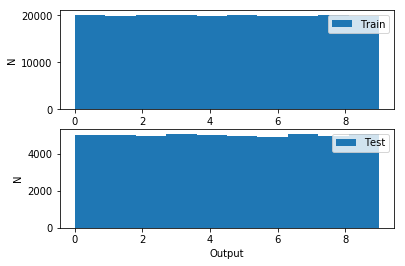

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_20 (Dense)             (None, 98)                76930     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                990       
Total params: 693,360
Trainable params: 693,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 178s 889us/step - loss: 0.4624 - acc: 0.8607
Epoch 2/30
200000/200000 [==============================] - 64s 318us/step

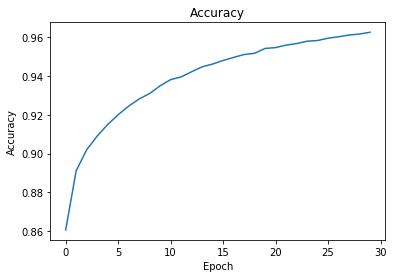

50000/50000 [==============================] - 5s 94us/step
----------------------------------------------------------------------------------------
Execution time: 3132s
----------------------------------------------------------------------------------------
Accuracy: 0.906


<__main__.NetworkTester instance at 0x1295ee878>

In [20]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 8],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.keras.optimizers.Adam())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [98] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


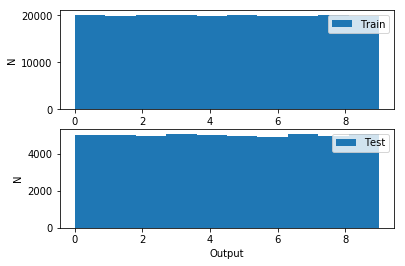

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_23 (Dense)             (None, 98)                76930     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                990       
Total params: 693,360
Trainable params: 693,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 51s 256us/step - loss: 0.4622 - acc: 0.8604
Epoch 2/30
200000/200000 [==============================] - 58s 291us/step 

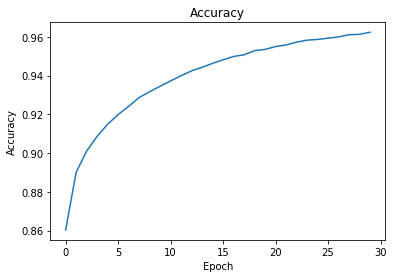

50000/50000 [==============================] - 5s 90us/step
----------------------------------------------------------------------------------------
Execution time: 1730s
----------------------------------------------------------------------------------------
Accuracy: 0.905


<__main__.NetworkTester instance at 0x128fe1200>

In [21]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 8],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [98] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


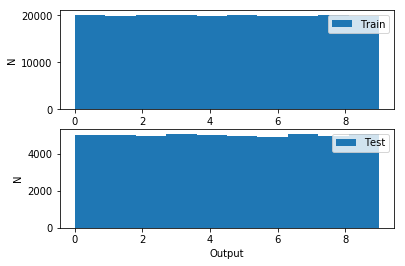

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_26 (Dense)             (None, 98)                76930     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                990       
Total params: 693,360
Trainable params: 693,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
200000/200000 [==============================] - 50s 250us/step - loss: 0.7864 - acc: 0.7968
Epoch 2/30
200000/200000 [==============================] - 38s 190us/step 

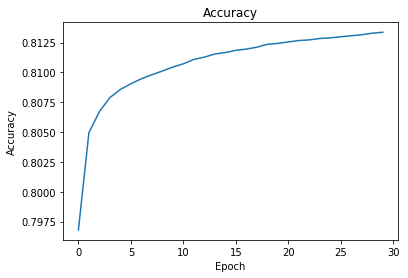

50000/50000 [==============================] - 6s 112us/step
----------------------------------------------------------------------------------------
Execution time: 2664s
----------------------------------------------------------------------------------------
Accuracy: 0.813


<__main__.NetworkTester instance at 0x150b7e200>

In [22]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 8],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.keras.optimizers.SGD(lr=0.05, decay=0.1))

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [98] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=True, use_regularization=False
----------------------------------------------------------------------------------------


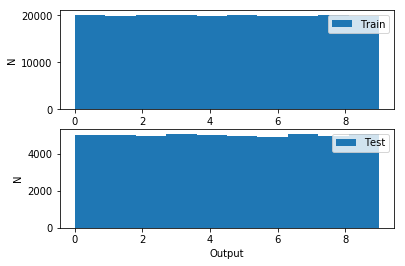

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 98)                76930     
_________________________________________________________________
dropout_1 (Dropout)          (None, 98)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                990       
Total params: 693,360
Trainable params: 693,360
Non-t

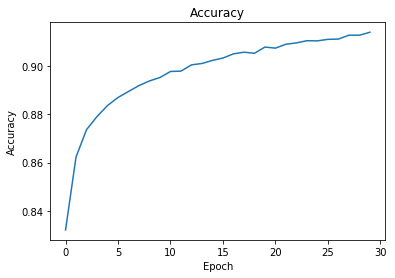

50000/50000 [==============================] - 11s 221us/step
----------------------------------------------------------------------------------------
Execution time: 1933s
----------------------------------------------------------------------------------------
Accuracy: 0.906


<__main__.NetworkTester instance at 0x123b84050>

In [23]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 8],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              use_dropout=True,
              dropout_prob=0.3,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [98] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.200
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=True, use_regularization=False
----------------------------------------------------------------------------------------


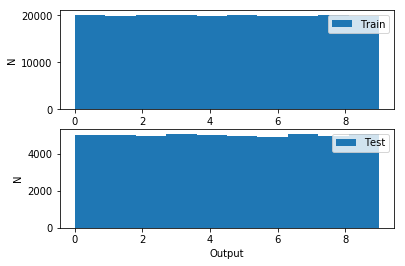

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 98)                76930     
_________________________________________________________________
dropout_3 (Dropout)          (None, 98)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                990       
Total params: 693,360
Trainable params: 693,360
Non-t

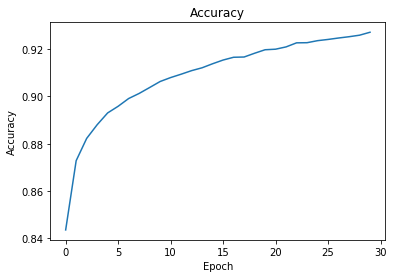

50000/50000 [==============================] - 5s 110us/step
----------------------------------------------------------------------------------------
Execution time: 2418s
----------------------------------------------------------------------------------------
Accuracy: 0.905


<__main__.NetworkTester instance at 0x12852f998>

In [24]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 8],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              use_dropout=True,
              dropout_prob=0.2,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [98] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.150
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=True, use_regularization=False
----------------------------------------------------------------------------------------


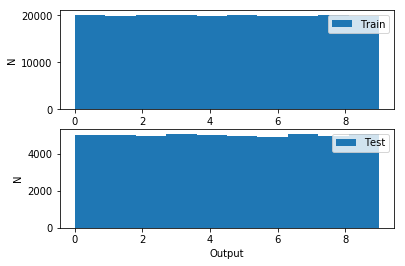

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 98)                76930     
_________________________________________________________________
dropout_5 (Dropout)          (None, 98)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                990       
Total params: 693,360
Trainable params: 693,360
Non-t

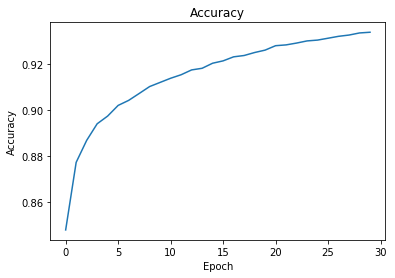

50000/50000 [==============================] - 7s 134us/step
----------------------------------------------------------------------------------------
Execution time: 1397s
----------------------------------------------------------------------------------------
Accuracy: 0.908


<__main__.NetworkTester instance at 0x12a04c2d8>

In [25]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 8],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              use_dropout=True,
              dropout_prob=0.15,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [98] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 2 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.200
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=True, use_regularization=True
----------------------------------------------------------------------------------------


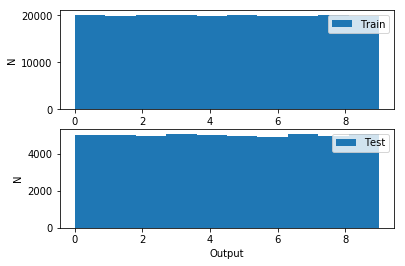

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 98)                76930     
_________________________________________________________________
dropout_7 (Dropout)          (None, 98)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                990       
Total params: 693,360
Trainable params: 693,360
Non-t

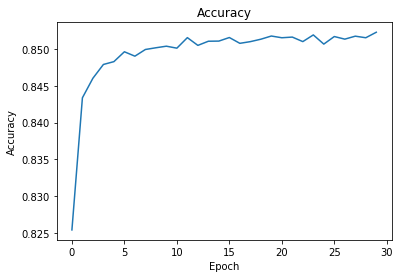

50000/50000 [==============================] - 8s 163us/step
----------------------------------------------------------------------------------------
Execution time: 2369s
----------------------------------------------------------------------------------------
Accuracy: 0.873


<__main__.NetworkTester instance at 0x128fb9200>

In [26]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 8],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              use_dropout=True,
              use_regularization=True,
              l1=10e-5,
              l2=10e-05,
              dropout_prob=0.2,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> sigmoid -> [196] -> relu -> [224] -> relu -> [28] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 4 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.200
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=True, use_regularization=True
----------------------------------------------------------------------------------------


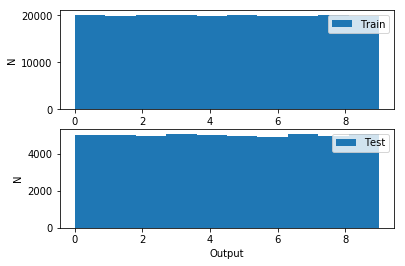

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_8 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 196)               153860    
_________________________________________________________________
dropout_9 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 224)               44128     
_____________________________________________________

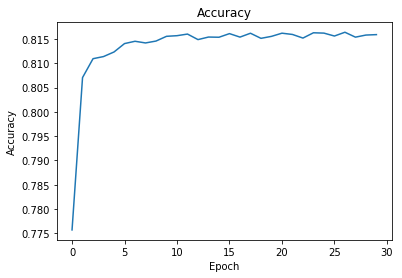

50000/50000 [==============================] - 10s 196us/step
----------------------------------------------------------------------------------------
Execution time: 3524s
----------------------------------------------------------------------------------------
Accuracy: 0.837


<__main__.NetworkTester instance at 0x1286696c8>

In [27]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 4, image_size * 8, image_size],
              hidden_layers_activations=[tf.nn.sigmoid, tf.nn.relu, tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              use_dropout=True,
              use_regularization=True,
              l1=10e-5,
              l2=10e-05,
              dropout_prob=0.2,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> sigmoid -> [196] -> relu -> [224] -> relu -> [28] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 4 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.200
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=True, use_regularization=False
----------------------------------------------------------------------------------------


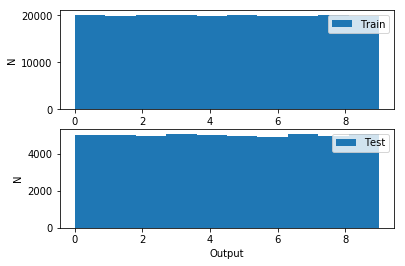

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_12 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 196)               153860    
_________________________________________________________________
dropout_13 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 224)               44128     
_____________________________________________________

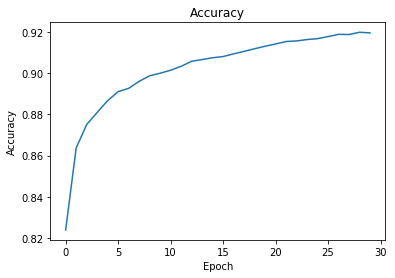

50000/50000 [==============================] - 6s 120us/step
----------------------------------------------------------------------------------------
Execution time: 1489s
----------------------------------------------------------------------------------------
Accuracy: 0.907


<__main__.NetworkTester instance at 0x1301db758>

In [28]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 4, image_size * 8, image_size],
              hidden_layers_activations=[tf.nn.sigmoid, tf.nn.relu, tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              use_dropout=True,
              dropout_prob=0.2,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> sigmoid -> [196] -> relu -> [224] -> relu -> [28] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 4 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


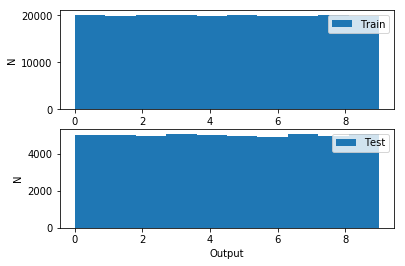

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_51 (Dense)             (None, 196)               153860    
_________________________________________________________________
dense_52 (Dense)             (None, 224)               44128     
_________________________________________________________________
dense_53 (Dense)             (None, 28)                6300      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                290       
Total params: 820,018
Trainable params: 820,018
Non-t

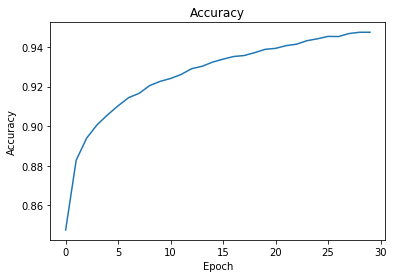

50000/50000 [==============================] - 7s 133us/step
----------------------------------------------------------------------------------------
Execution time: 1571s
----------------------------------------------------------------------------------------
Accuracy: 0.905


<__main__.NetworkTester instance at 0x12439eb90>

In [29]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 4, image_size * 8, image_size],
              hidden_layers_activations=[tf.nn.sigmoid, tf.nn.relu, tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> relu -> [196] -> relu -> [224] -> relu -> [28] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 4 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


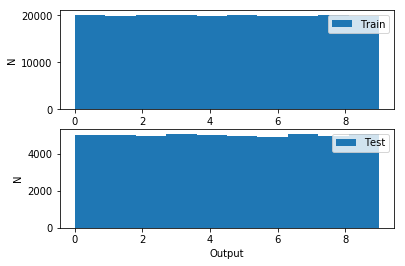

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_56 (Dense)             (None, 196)               153860    
_________________________________________________________________
dense_57 (Dense)             (None, 224)               44128     
_________________________________________________________________
dense_58 (Dense)             (None, 28)                6300      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                290       
Total params: 820,018
Trainable params: 820,018
Non-t

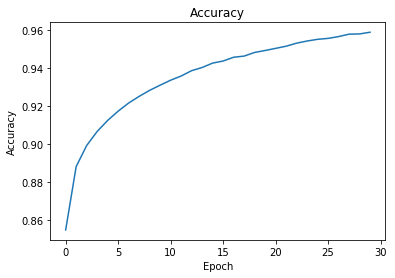

50000/50000 [==============================] - 6s 127us/step
----------------------------------------------------------------------------------------
Execution time: 1492s
----------------------------------------------------------------------------------------
Accuracy: 0.909


<__main__.NetworkTester instance at 0x12868b9e0>

In [30]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 4, image_size * 8, image_size],
              hidden_layers_activations=[tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> sigmoid -> [196] -> sigmoid -> [224] -> sigmoid -> [28] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 4 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


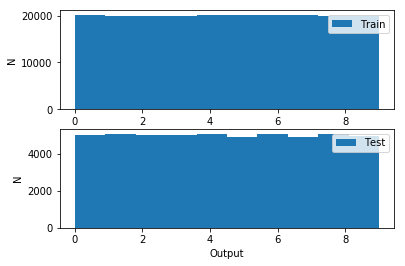

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_2 (Dense)              (None, 224)               44128     
_________________________________________________________________
dense_3 (Dense)              (None, 28)                6300      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                290       
Total params: 820,018
Trainable params: 820,018
Non-t

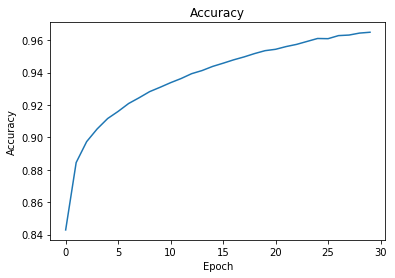

50000/50000 [==============================] - 5s 101us/step
----------------------------------------------------------------------------------------
Execution time: 1547s
----------------------------------------------------------------------------------------
Accuracy: 0.908


<__main__.NetworkTester instance at 0x12d5233b0>

In [14]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 4, image_size * 8, image_size],
              hidden_layers_activations=[tf.nn.sigmoid, tf.nn.sigmoid, tf.nn.sigmoid, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.AdamOptimizer())

----------------------------------------------------------------------------------------
 [28 x 28] -> [784] -> sigmoid -> [196] -> tanh -> [224] -> tanh -> [28] -> relu -> [10] -> softmax
----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (200000, 28, 28))
('X_test shape =', (50000, 28, 28))
('y_train shape =', (200000,))
('y_test shape =', (50000,))
Hidden layers = 4 layers
Epochs to train = 30
Beta for regularization: l1 = 0.000, l2 = 0.000
Dropout prob = 0.300
----------------------------------------------------------------------------------------
Initial flags:
----------------------------------------------------------------------------------------
use_dropout=False, use_regularization=False
----------------------------------------------------------------------------------------


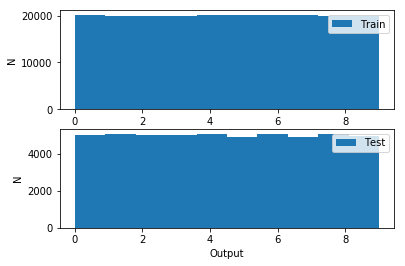

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_7 (Dense)              (None, 224)               44128     
_________________________________________________________________
dense_8 (Dense)              (None, 28)                6300      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                290       
Total params: 820,018
Trainable params: 820,018
Non-t

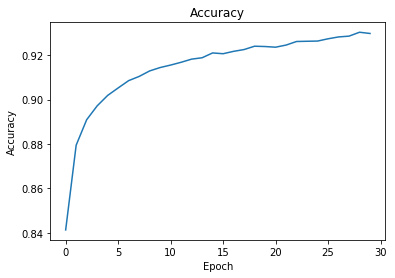

50000/50000 [==============================] - 5s 98us/step
----------------------------------------------------------------------------------------
Execution time: 1872s
----------------------------------------------------------------------------------------
Accuracy: 0.899


<__main__.NetworkTester instance at 0x12e7d7050>

In [15]:
NetworkTester(x=X, 
              y=Y,
              hidden_layers_sizes=[image_size * image_size, image_size * image_size / 4, image_size * 8, image_size],
              hidden_layers_activations=[tf.nn.sigmoid, tf.nn.tanh, tf.nn.tanh, tf.nn.relu],
              dataset_size=250000,
              optimizer=tf.train.AdamOptimizer())

In [16]:
pd.set_option('display.max_colwidth', 300)

In [17]:
comparator.debug()

----------------------------------------------------
Best test accuracy found: 0.908


,architecture,accuracy
0,[28 x 28] -> [784] -> sigmoid -> [196] -> sigmoid -> [224] -> sigmoid -> [28] -> relu -> [10] -> softmax,0.90786
1,[28 x 28] -> [784] -> sigmoid -> [196] -> tanh -> [224] -> tanh -> [28] -> relu -> [10] -> softmax,0.89938
